In [1]:
%load_ext autoreload
%autoreload 2
from data import irish

In [45]:
x_train, x_test, y_train, y_test, img_channels, img_rows, img_cols=irish.load_data()
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Could not find  irish.npz . Downloading/extracting/reencoding dataset...
Loading images from /home/facuq/.keras/datasets/irish/images...
Loading  58114  images..
0.0 %


/home/facuq/dev/exp/rotation/.env/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


9.999311697697628 %
19.998623395395256 %
29.997935093092888 %
39.99724679079051 %
49.99655848848815 %
59.995870186185776 %
69.9951818838834 %
79.99449358158103 %
89.99380527927866 %
99.9931169769763 %
Done.
Saving binary version of dataset to /home/facuq/.keras/datasets/irish/irish.npz
Done.
(49184, 64, 64, 1) (8930, 64, 64, 1) (49184,) (8930,)


In [47]:
import matplotlib.pyplot as plt
print(x_train.dtype,x_train.min(),x_train.max(),x_train.mean())




uint8 0 239 20.930692227226462


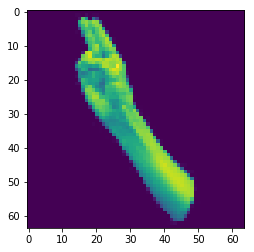

In [46]:
plt.imshow(x_train[20000,:,:,0])

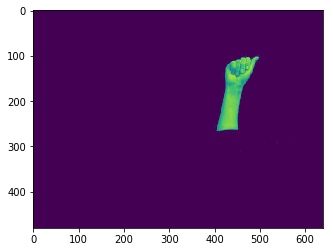

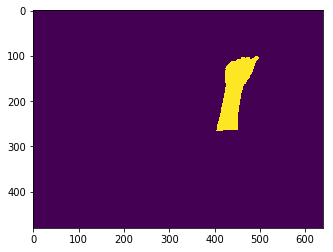

(102, 404, 267, 499)
102 267 404 499


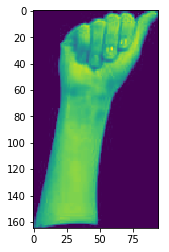

In [85]:
import numpy as np
import skimage

f="/home/facuq/.keras/datasets/irish/images/Person1-A-1-13.jpg"
image=skimage.io.imread(f)

import matplotlib.pyplot as plt
import skimage.morphology 
import skimage.measure 

plt.imshow(image)
plt.show()


binary_image=skimage.morphology.opening(image>40)
plt.imshow(binary_image)
plt.show()

label=skimage.measure.label(binary_image)

biggest_region=None

for region in skimage.measure.regionprops(label):
    print(region.bbox)
    if biggest_region==None:
        biggest_region=region
    else:
        if region.area>biggest_region.area:
            biggest_region=region

min_r, min_c, max_r, max_c = biggest_region.bbox


# r,c=np.where(image>40)
# min_r,max_r=r.min(),r.max()
# min_c,max_c=c.min(),c.max()
print(min_r,max_r,min_c,max_c)
plt.show()
hand=image[min_r:max_r,min_c:max_c]
plt.imshow(hand)
plt.show()

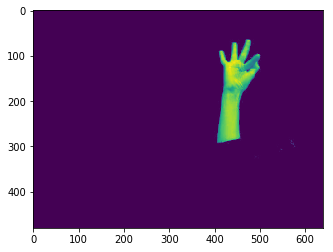

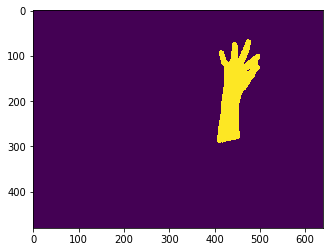

(64, 407, 292, 502)


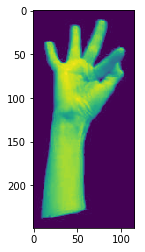

249 116 32 32 2.146551724137931 1.0
deltaw 133.0
(249, 248, 1)


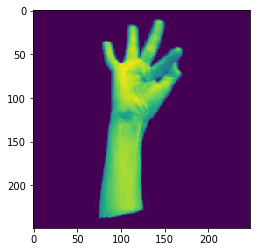

In [25]:
import numpy as np
import skimage

f="/home/facuq/.keras/datasets/irish/images/Person1-F-1-12.jpg"
image=skimage.io.imread(f)

import matplotlib.pyplot as plt
import skimage.morphology 
import skimage.measure 


plt.imshow(image)
plt.show()


hand_image=irish.crop_to_hand(image)
plt.imshow(hand_image)
plt.show()

image_size=(32,32)
background_color=np.array([0])
hand_image=hand_image[:,:,None]
hand_image_padded=irish.pad_to_aspect_ratio(hand_image,image_size,background_color)
print(hand_image_padded.shape)
plt.imshow(hand_image_padded[:,:,0])
plt.show()



In [ ]:
import numpy as np
import skimage

f="/home/facuq/.keras/datasets/irish/images/Person1-F-1-12.jpg"
image=skimage.io.imread(f)

import matplotlib.pyplot as plt
import skimage.morphology 
import skimage.measure 


plt.imshow(image)
plt.show()


hand_image=irish.crop_to_hand(image)
plt.imshow(hand_image)
plt.show()

image_size=(32,32)
background_color=np.array([0])
hand_image=hand_image[:,:,None]
hand_image_padded=irish.pad_to_aspect_ratio(hand_image,image_size,background_color)
print(hand_image_padded.shape)
plt.imshow(hand_image_padded[:,:,0])
plt.show()



In [ ]:
import os
import string
pad=10
image_size=(128,128)
basepath="/home/facuq/.keras/datasets/irish/images/"
for person in range(1,7):
    for letter in list(string.ascii_uppercase):
        for rep in range(1,4):
            for frame in range(1,31):
                filename="Person%d-%s-%d-%d.jpg" % (person,letter,rep,frame)
                image=skimage.io.imread(os.path.join(basepath,filename))
                image=irish.preprocess_image(image,pad,image_size)
                skimage.io.imsave(os.path.join("/home/facuq/test/",filename),image)

/home/facuq/dev/exp/rotation/.env/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
